<a href="https://colab.research.google.com/github/2256haradityam/Projects/blob/main/CARPRICEPREDICTION1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://github.com/2256haradityam/dataset/raw/refs/heads/main/bc.csv')

In [4]:
df.head()

,CLASS,AGE,MP,SOT,INV,NC,DM,BS,BQ,IR
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [21]:
df['NC'].value_counts()

,count
NC,
no,222
yes,56
?,8


In [19]:
df['NC']  = df['NC'].apply(lambda x: 2 if x == '0-2' else (5 if x == '3-5' else (8 if x == '6-8' else (11 if x == '9-11' else (14 if x == '12-14' else (17 if x == '15-17' else (26 if x == '24-26' else 27)))))))

In [ ]:


# Assuming 'df' is the DataFrame containing the necessary columns

# 1. Tumor Progression Risk Index (TPRI)
df['TPRI'] = (df['SIZEOFTUMOR'] * df['INVNODES'] * df['DM']) / \
             (df['SIZEOFTUMOR'].max() * df['INVNODES'].max() * df['DM'].max())

# 2. Menopause-Age Interaction (Menopausal Status Influence)
df['MA'] = df['MENOPAUSE'] + df['AGE']

# 3. Breast-Quadrant Interaction (Breast Quadrant Complexity)
df['BQC'] = df['BS'] + df['BQ']

# 4. Node Caps Malignancy Interaction (Node-Caps with Degree of Malignancy)
df['NCM'] = df['NC'] * df['DM']

# 5. Tumor-Node Recurrence Factor (TNRF)
df['TNRF'] = (df['SIZEOFTUMOR'] + df['INVNODES']) * df['NC']

# 6. Malignancy Recurrence Weight (MRW)
df['MRW'] = df['IR'] * df['DM'] * df['NC']

# 7. Age-Tumor Size Risk
df['ATR'] = df['AGE'].astype(int) * df['SIZEOFTUMOR']

# 8. Menopausal Tumor Involvement
df['MTI'] = df['MENOPAUSE'] * df['SIZEOFTUMOR'] * df['INVNODES']

# 9. Localized Aggression Score
df['LA'] = df['BS'] * \
                             df['BQ'] * \
                             df['DM']

# Display the first few rows to verify the new columns



<Axes: >

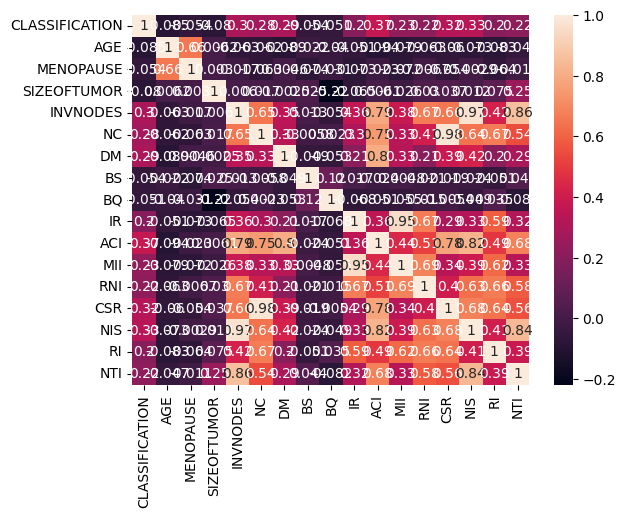

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df['SIZEOFTUMOR'] = df['SIZEOFTUMOR'].apply(lambda x: 0 if x in['45-49','5-9'] else (1 if x in ['50-54','0-4'] else (2 if x == '30-34' else (3 if x == '25-29' else (4 if x == '20-24' else (5 if x == '15-19' else(6 if x == '10-14' else (7 if x == '40-44' else 8))))))))

In [ ]:
df['INVNODES'].value_counts()

,count
INVNODES,
0,212
1,63
2,10


In [ ]:
df['ACI'] = df['NC'] + df['DM']+ df['INVNODES']

In [ ]:
df['MII'] = df['DM']*df['IR']

In [ ]:
df['RNI'] = df['INVNODES'] * df['IR']

In [ ]:
df['CSR']  = df['NC'] * df['DM']

In [ ]:
df['NIS'] = df['INVNODES'] * df['DM']

In [ ]:
df['RI'] = df['IR'] * df['NC']

In [ ]:
df['NTI'] = df['INVNODES'] * df['SIZEOFTUMOR']

In [ ]:
columns_to_encode = ['AGE', 'SIZEOFTUMOR', 'MENOPAUSE', 'INVNODES', 'DM', 'BQ','RNI','CSR','NIS','MII','ACI','RI','NTI','TPRI','MA','BQC','NCM','TNRF','MRW','ATR','MTI','LA']

# Perform One-Hot Encoding and drop the original columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
df_encoded = df_encoded.astype(int)

In [ ]:
df_encoded.head()

,CLASSIFICATION,NC,BS,IR,RI,NTI,AGE_1,AGE_2,AGE_3,AGE_4,...,NIS_4,NIS_6,MII_1,MII_2,MII_3,ACI_2,ACI_3,ACI_4,ACI_5,ACI_6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 55 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CLASSIFICATION  285 non-null    int64
 1   NC              285 non-null    int64
 2   BS              285 non-null    int64
 3   IR              285 non-null    int64
 4   AGE_1           285 non-null    int64
 5   AGE_2           285 non-null    int64
 6   AGE_3           285 non-null    int64
 7   AGE_4           285 non-null    int64
 8   SIZEOFTUMOR_1   285 non-null    int64
 9   SIZEOFTUMOR_2   285 non-null    int64
 10  SIZEOFTUMOR_3   285 non-null    int64
 11  SIZEOFTUMOR_4   285 non-null    int64
 12  SIZEOFTUMOR_5   285 non-null    int64
 13  SIZEOFTUMOR_6   285 non-null    int64
 14  SIZEOFTUMOR_7   285 non-null    int64
 15  SIZEOFTUMOR_8   285 non-null    int64
 16  MENOPAUSE_1     285 non-null    int64
 17  MENOPAUSE_2     285 non-null    int64
 18  INVNODES_1      285 non-null  

In [ ]:
df['INVNODES'] = df['INVNODES'].apply(lambda x: 0 if x in ['0-2'] else (1 if x in ['3-5', '6-8', '9-11'] else (2 if x in ['15-17', '12-14', '24-26'] else x)))

In [ ]:
df['BQ'] = df['BQ'].map({'left_low':0,'left_up':1,'right_up':2,'right_low':3,'central':4})

In [ ]:
df['MENOPAUSE']=df['MENOPAUSE'].fillna(2.0)

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have a DataFrame named 'df'

# Filter rows with NA values in 'NC' column
df_na_nc = df[df['NC'].isna()]

# Remove rows with NA values in 'NC' column from the rest of the DataFrame
df_no_na_nc = df[df['NC'].notna()]

# Calculate cosine similarity between rows with NA values and rows without NA values
similarity_matrix = cosine_similarity(df_no_na_nc.drop('NC', axis=1), df_na_nc.drop('NC', axis=1))

# Find the index of the most similar row for each row with NA values
most_similar_index = similarity_matrix.argmax(axis=1)

# Get the corresponding rows from the DataFrame without NA values
similar_rows = df_no_na_nc.iloc[most_similar_index]

print(similar_rows)

    CLASSIFICATION  AGE  MENOPAUSE  SIZEOFTUMOR  INVNODES   NC  DM  BS  BQ  IR
4                0    1          0            1         0  0.0   2   1   3   0
0                0    0          0            2         0  0.0   3   0   0   0
7                0    3          1            4         0  0.0   1   0   0   0
6                0    2          0            3         0  0.0   2   0   0   0
0                0    0          0            2         0  0.0   3   0   0   0
..             ...  ...        ...          ...       ...  ...  ..  ..  ..  ..
0                0    0          0            2         0  0.0   3   0   0   0
0                0    0          0            2         0  0.0   3   0   0   0
6                0    2          0            3         0  0.0   2   0   0   0
4                0    1          0            1         0  0.0   2   1   3   0
4                0    1          0            1         0  0.0   2   1   3   0

[277 rows x 10 columns]


In [ ]:
df[df['NC'].isna()]

,CLASSIFICATION,AGE,MENOPAUSE,SIZEOFTUMOR,INVNODES,NC,DM,BS,BQ,IR,RNI,CSR,NIS,MII,ACI


In [ ]:
df['NC'].value

In [ ]:
df['NC'] = df['NC'].astype(int)

In [ ]:
df_encoded['ACI'].value_counts()

KeyError: 'ACI'

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df_encoded.drop(columns='CLASSIFICATION')
y = df_encoded['CLASSIFICATION']

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Brute force PCA (testing different numbers of components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Select important features based on Gini index
model = SelectFromModel(rf_selector, prefit=True)
X_selected = model.transform(X_pca)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Classifiers and parameter grids for brute-force optimization
classifiers = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, max_iter=1000)
}

# Brute force parameter grid for each classifier
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
}

# Brute force search using GridSearchCV
best_models = {}
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[classifier_name] = grid_search.best_estimator_

# Evaluate each model
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")


Training SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVM Accuracy: 0.7017543859649122
RandomForest Accuracy: 0.7017543859649122
KNN Accuracy: 0.6842105263157895
LogisticRegression Accuracy: 0.7017543859649122


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df_encoded.drop(columns='CLASSIFICATION')
y = df_encoded['CLASSIFICATION']

# Standardize the features before applying PCA
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Brute force PCA (testing different numbers of components)
pca = PCA()
X_pca = pca.fit_transform(X)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Select important features based on Gini index
model = SelectFromModel(rf_selector, prefit=True)
X_selected = model.transform(X_pca)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Classifiers and parameter grids for brute-force optimization
classifiers = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, max_iter=1000)
}

# Brute force parameter grid for each classifier
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
}

# Brute force search using GridSearchCV
best_models = {}
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[classifier_name] = grid_search.best_estimator_

# Evaluate each model
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")


Training SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVM Accuracy: 0.7192982456140351
RandomForest Accuracy: 0.7017543859649122
KNN Accuracy: 0.6666666666666666
LogisticRegression Accuracy: 0.7368421052631579


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df_encoded.drop(columns='CLASSIFICATION')
y = df_encoded['CLASSIFICATION']

# Standardize the features before applying PCA
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Brute force PCA (testing different numbers of components)
pca = PCA()
X_pca = pca.fit_transform(X)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Select important features based on Gini index
model = SelectFromModel(rf_selector, prefit=True)
X_selected = model.transform(X_pca)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Classifiers and parameter grids for brute-force optimization
classifiers = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, max_iter=1000)
}

# Brute force parameter grid for each classifier
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
}

# Brute force search using GridSearchCV with KFold cross-validation
best_models = {}
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=kf, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[classifier_name] = grid_search.best_estimator_

# Evaluate each model and print classification report for the best variant
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))


Training SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVM Accuracy: 0.6842105263157895
SVM Classification Report:

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        37
           1       1.00      0.10      0.18        20

    accuracy                           0.68        57
   macro avg       0.84      0.55      0.49        57
weighted avg       0.79      0.68      0.59        57

RandomForest Accuracy: 0.6666666666666666
RandomForest Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.92      0.78        37
           1       0.57      0.20      0.30        20

    accuracy                       

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df_encoded.drop(columns='CLASSIFICATION')
y = df_encoded['CLASSIFICATION']

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Brute force PCA (testing different numbers of components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Select important features based on Gini index
model = SelectFromModel(rf_selector, prefit=True)
X_selected = model.transform(X_pca)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Classifiers and parameter grids for brute-force optimization
classifiers = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, max_iter=1000)
}

# Brute force parameter grid for each classifier
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
}

# Brute force search using GridSearchCV with KFold cross-validation
best_models = {}
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=kf, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[classifier_name] = grid_search.best_estimator_

# Evaluate each model and print classification report for the best variant
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))


Training SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVM Accuracy: 0.7543859649122807
SVM Classification Report:

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        37
           1       1.00      0.30      0.46        20

    accuracy                           0.75        57
   macro avg       0.86      0.65      0.65        57
weighted avg       0.82      0.75      0.71        57

RandomForest Accuracy: 0.7017543859649122
RandomForest Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.62      0.40      0.48        20

    accuracy                       

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 133 entries, CLASSIFICATION to LA_12
dtypes: int64(133)
memory usage: 296.3 KB


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df_encoded.drop(columns='CLASSIFICATION')
y = df_encoded['CLASSIFICATION']

# Standardize the features before feeding them to the model
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Classifier and parameter grid for brute-force optimization
classifier = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Brute force search using GridSearchCV with KFold cross-validation and train_test_split
train_test_splits = [0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14, 0.15,0.16,0.17,0.18,0.19, 0.2,0.21,0.22,0.23,0.24, 0.25,0.26,0.27,0.28,0.29, 0.3,0.31,0.32, 0.33,0.34,0.35,0.36,0.37,0.38,0.39, 0.4,0.41,0.42,0.43,0.44, 0.45, 0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54, 0.55,0.56,0.57,0.58,0.59, 0.6]  # Different train-test split ratios

best_models = {}
for split_ratio in train_test_splits:
    print(f"\nEvaluating with train_test_split ratio: {1 - split_ratio} train, {split_ratio} test\n")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42)

    print(f"Training SVM with split {split_ratio}...")

    # Brute force with GridSearchCV and KFold
    grid_search = GridSearchCV(classifier, param_grid, cv=kf, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test data
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"SVM Accuracy with split {split_ratio}: {accuracy}")
    print(f"SVM Classification Report with split {split_ratio}:\n")
    print(classification_report(y_test, y_pred))

    # Store the best model for each split
    best_models[split_ratio] = best_model

# After completing all splits, the best models will be stored in `best_models`


Evaluating with train_test_split ratio: 0.95 train, 0.05 test

Training SVM with split 0.05...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
SVM Accuracy with split 0.05: 0.7333333333333333
SVM Classification Report with split 0.05:

              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       1.00      0.33      0.50         6

    accuracy                           0.73        15
   macro avg       0.85      0.67      0.66        15
weighted avg       0.82      0.73      0.69        15


Evaluating with train_test_split ratio: 0.94 train, 0.06 test

Training SVM with split 0.06...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
SVM Accuracy with split 0.06: 0.6666666666666666
SVM Classification Report with split 0.06:

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       1.00      0.25      0.40         8

    acc

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df_encoded.drop(columns='CLASSIFICATION')
y = df_encoded['CLASSIFICATION']

# Standardize the features before applying PCA
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Brute force PCA (testing different numbers of components)
pca = PCA()
X_pca = pca.fit_transform(X)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Select important features based on Gini index
model = SelectFromModel(rf_selector, prefit=True)
X_selected = model.transform(X_pca)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Classifiers and parameter grids for brute-force optimization
classifiers = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, max_iter=1000)
}

# Brute force parameter grid for each classifier
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
}

# Brute force search using GridSearchCV with KFold cross-validation and train_test_split
train_test_splits = [0.1,0.15, 0.2, 0.25,0.3,0.35, 0.4,0.45, 0.5,0.55,0.6]  # Different train-test split ratios

best_models = {}
for split_ratio in train_test_splits:
    print(f"\nEvaluating with train_test_split ratio: {1 - split_ratio} train, {split_ratio} test\n")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=split_ratio, random_state=42)

    for classifier_name, classifier in classifiers.items():
        print(f"Training {classifier_name} with split {split_ratio}...")

        # Brute force with GridSearchCV and KFold
        grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=kf, n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        # Evaluate the best model on the test data
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{classifier_name} Accuracy with split {split_ratio}: {accuracy}")
        print(f"{classifier_name} Classification Report with split {split_ratio}:\n")
        print(classification_report(y_test, y_pred))

        # Store the best model for each classifier and split
        best_models[(classifier_name, split_ratio)] = best_model

# After completing all splits and classifiers, the best models will be stored in `best_models`



Evaluating with train_test_split ratio: 0.9 train, 0.1 test

Training SVM with split 0.1...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
SVM Accuracy with split 0.1: 0.6896551724137931
SVM Classification Report with split 0.1:

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        18
           1       1.00      0.18      0.31        11

    accuracy                           0.69        29
   macro avg       0.83      0.59      0.55        29
weighted avg       0.79      0.69      0.61        29

Training RandomForest with split 0.1...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RandomForest Accuracy with split 0.1: 0.6896551724137931
RandomForest Classification Report with split 0.1:

              precision    recall  f1-score   support

           0       0.68      0.94      0.79        18
           1       0.75      0.27      0.40        11

    accuracy                           0.69        

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df.drop(columns='CLASSIFICATION')
y = df['CLASSIFICATION']

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Brute force PCA (testing different numbers of components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Select important features based on Gini index
model = SelectFromModel(rf_selector, prefit=True)
X_selected = model.transform(X_pca)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Classifiers and parameter grids for brute-force optimization
classifiers = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, max_iter=1000)
}

# Brute force parameter grid for each classifier
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
}

# Brute force search using GridSearchCV
best_models = {}
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[classifier_name] = grid_search.best_estimator_

# Evaluate each model
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")


Training SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVM Accuracy: 0.7368421052631579
RandomForest Accuracy: 0.7368421052631579
KNN Accuracy: 0.7368421052631579
LogisticRegression Accuracy: 0.7368421052631579


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is your encoded DataFrame with the target column 'target'
X = df.drop(columns='CLASSIFICATION')
y = df['CLASSIFICATION']

# Standardize the features before applying PCA
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Brute force PCA (testing different numbers of components)
pca = PCA()
X_pca = pca.fit_transform(X)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Select important features based on Gini index
model = SelectFromModel(rf_selector, prefit=True)
X_selected = model.transform(X_pca)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Classifiers and parameter grids for brute-force optimization
classifiers = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, max_iter=1000)
}

# Brute force parameter grid for each classifier
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
}

# Brute force search using GridSearchCV
best_models = {}
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[classifier_name] = grid_search.best_estimator_

# Evaluate each model
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")


Training SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Training KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVM Accuracy: 0.7192982456140351
RandomForest Accuracy: 0.7192982456140351
KNN Accuracy: 0.6842105263157895
LogisticRegression Accuracy: 0.7017543859649122
